In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
delivery_data = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

In [3]:
delivery_data.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


# Предобработка данных

In [4]:
def getClearId(stringId, bound):
    """
    Форматирование поля ID по отступу
    """
    id = stringId[bound:]
    return int(id)

In [5]:

orders_id = delivery_data["Order ID"].astype(str).apply(lambda x: getClearId(x,3))
customer_id = delivery_data["Customer ID"].astype(str).apply(lambda x: getClearId(x,4))

delivery_data["Order ID"] = orders_id
delivery_data["Customer ID"] = customer_id

In [6]:
delivery_data = delivery_data.rename(columns={"Order ID":"orderID",
                      "Customer ID":"customerID",
                      "Order Date & Time":"time",
                      "Delivery Time (Minutes)":"delivery_time",
                      "Product Category":"category",
                      "Order Value (INR)":"priceUSD",
                      "Customer Feedback":"feedback",
                      "Service Rating":"stars_rating",
                      "Delivery Delay":"delivery_delay",
                      "Refund Requested":"is_refunded"})

In [7]:
#перевод инийских рупий в USD на момент 5 мая 2025 года
delivery_data["priceUSD"] = (delivery_data.priceUSD * 0.012).round(2)

## Форматирование даты

In [8]:
from datetime import datetime

In [9]:
def format_time(time_str):
    """Форматирование времени в формате ЧАС:МИНУТЫ:СЕКУНДЫ"""\
    
    time_str= time_str[:-2]
    time_obj = datetime.strptime(time_str, "%M:%S")
    return time_obj.time()

In [10]:
delivery_data["time"] = delivery_data.time.apply(lambda x: format_time(x))

In [11]:
delivery_data.head()

,orderID,customerID,Platform,time,delivery_time,category,priceUSD,feedback,stars_rating,delivery_delay,is_refunded
0,1,2824,JioMart,00:19:29,30,Fruits & Vegetables,4.58,"Fast delivery, great service!",5,No,No
1,2,1409,Blinkit,00:54:29,16,Dairy,3.35,Quick and reliable!,5,No,No
2,3,5506,JioMart,00:21:29,25,Beverages,7.19,Items missing from order.,2,No,Yes
3,4,5012,JioMart,00:19:29,42,Beverages,11.35,Items missing from order.,2,Yes,Yes
4,5,4657,Blinkit,00:49:29,30,Beverages,4.01,"Fast delivery, great service!",5,No,No


# Визуализация данных

<Axes: xlabel='priceUSD', ylabel='is_refunded'>

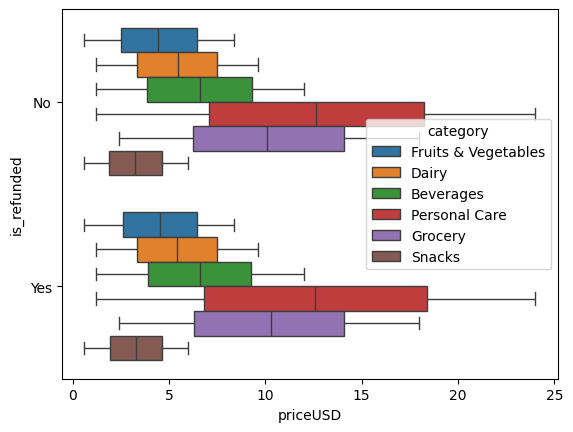

In [12]:
sns.boxplot(delivery_data,x="priceUSD",y="is_refunded", hue="category")

<Axes: xlabel='delivery_time', ylabel='is_refunded'>

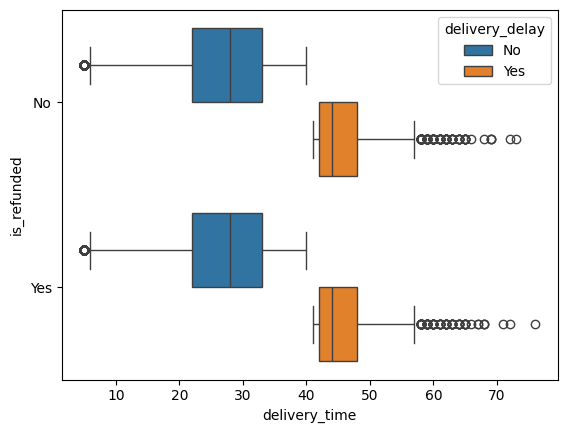

In [20]:
sns.boxplot(delivery_data,x="delivery_time", y="is_refunded", hue="delivery_delay")